In [ ]:
# Get the uniprot mapping IDs
# ! wget https://ftp.uniprot.org/pub/databases/uniprot/current_release/knowledgebase/idmapping/by_organism/HUMAN_9606_idmapping.dat.gz

# Grep mapping ids to string only
# ! grep STRING HUMAN_9606_idmapping.dat > string.map


# Get string interactions
# ! wget https://stringdb-static.org/download/protein.links.v11.5/9606.protein.links.v11.5.txt.gz

In [1]:
import pandas as pd

In [2]:
dfmap = pd.read_csv('../data/string.map', sep='\t', names=['protid', 'db', 'ensmbl'])
dfstring = pd.read_csv('../data/9606.protein.links.v12.0.txt', sep=' ')
# df = pd.read_csv('only_pc_results/syn_results/final_results.tsv', sep='\t')
df = pd.read_csv('nbatch_with_bc/syn_results/final_results.tsv', sep='\t')

In [14]:
df

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug
0,Pgcihh:QjBWjc,-0.008738,0.023000,-0.372803,0.709396,-0.054749,0.037273,781,0.015789,True,P62877*Q9BW92,2,CHEMBL109480
1,Ojfbfj:Qbebgf,0.402811,0.103000,3.906345,0.000102,0.200390,0.605232,781,0.020451,True,O95159*Q14165,2,CHEMBL109480
2,Oaaehj:Pdfjai,0.008165,0.012000,0.686214,0.492783,-0.015191,0.031521,781,0.008081,True,O00479*P35908,2,CHEMBL109480
3,Pgajid:Qbdecd,0.013169,0.016000,0.831124,0.406159,-0.017935,0.044274,781,0.005108,True,P60983*Q13423,2,CHEMBL109480
4,Paeaid:Pbfffj,-0.000984,0.002000,-0.473523,0.635973,-0.005062,0.003095,781,0.186955,True,P04083*P15559,2,CHEMBL109480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174643,Obfajb:Pgbjgc:Pgbjge:QjYcZa,0.000047,0.000062,0.750491,0.453186,-0.000075,0.000169,786,0.097909,True,O15091*P61962*P61964*Q9Y2Z0,4,CHEMBL98
1174644,Oedggf:QgGMVd:QiNhgg:QjYcDf,-0.000003,0.000020,-0.162147,0.871232,-0.000042,0.000036,786,0.113248,True,O43665*Q6GMV3*Q8N766*Q9Y2D5,4,CHEMBL98
1174645,Pbbebd:Pcgaag:Qahibh:QiNfLi,0.000010,0.000027,0.368745,0.712418,-0.000042,0.000062,786,0.216411,True,P11413*P26006*Q07817*Q8N5L8,4,CHEMBL98
1174646,Ojfbjh:Pbagbj:QgDDii:QjHDde,0.000076,0.000052,1.477860,0.139849,-0.000025,0.000177,786,0.206612,True,O95197*P10619*Q6DD88*Q9HD34,4,CHEMBL98


In [3]:
df.snps.drop_duplicates()

0                        P62877*Q9BW92
1                        O95159*Q14165
2                        O00479*P35908
3                        P60983*Q13423
4                        P04083*P15559
                      ...             
1174643    O15091*P61962*P61964*Q9Y2Z0
1174644    O43665*Q6GMV3*Q8N766*Q9Y2D5
1174645    P11413*P26006*Q07817*Q8N5L8
1174646    O95197*P10619*Q6DD88*Q9HD34
1174647    Q13243*Q9BV38*Q9HCN8*Q99538
Name: snps, Length: 1030114, dtype: object

In [50]:
dfmap.head()

,protid,db,ensmbl
0,P31946,STRING,9606.ENSP00000361930
1,P62258,STRING,9606.ENSP00000264335
2,Q04917,STRING,9606.ENSP00000248975
3,P61981,STRING,9606.ENSP00000306330
4,P31947,STRING,9606.ENSP00000340989


In [4]:
dfstring

,protein1,protein2,combined_score
0,9606.ENSP00000000233,9606.ENSP00000356607,173
1,9606.ENSP00000000233,9606.ENSP00000427567,154
2,9606.ENSP00000000233,9606.ENSP00000253413,151
3,9606.ENSP00000000233,9606.ENSP00000493357,471
4,9606.ENSP00000000233,9606.ENSP00000324127,201
...,...,...,...
13715399,9606.ENSP00000501317,9606.ENSP00000475489,195
13715400,9606.ENSP00000501317,9606.ENSP00000370447,158
13715401,9606.ENSP00000501317,9606.ENSP00000312272,226
13715402,9606.ENSP00000501317,9606.ENSP00000402092,169


In [3]:
def undo(string):    
    string = ''.join([ x if ord(x)<91 else str(ord(x)-97) for x in string ])
    string = string[:6]+'.'+string[6:].replace('HUMAN', '_HUMAN') #not sure these 6
    return string


In [3]:
#Getting second order interactions
df = df[df.order == 2]
# df['prots'] = df.snps.apply(lambda x: x.split('.')[0]+'+'+x.split('*')[1].split('.')[0])
df['prots'] = df.snps.str.replace('*', '+')
df.head()

C:\Users\wen068\AppData\Local\Temp\ipykernel_26304\4268088652.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['prots'] = df.snps.str.replace('*', '+')


,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug,prots
0,Pgcihh:QjBWjc,-0.008738,0.023,-0.372803,0.709396,-0.054749,0.037273,781,0.015789,True,P62877*Q9BW92,2,CHEMBL109480,P62877+Q9BW92
1,Ojfbfj:Qbebgf,0.402811,0.103,3.906345,0.000102,0.200390,0.605232,781,0.020451,True,O95159*Q14165,2,CHEMBL109480,O95159+Q14165
2,Oaaehj:Pdfjai,0.008165,0.012,0.686214,0.492783,-0.015191,0.031521,781,0.008081,True,O00479*P35908,2,CHEMBL109480,O00479+P35908
3,Pgajid:Qbdecd,0.013169,0.016,0.831124,0.406159,-0.017935,0.044274,781,0.005108,True,P60983*Q13423,2,CHEMBL109480,P60983+Q13423
4,Paeaid:Pbfffj,-0.000984,0.002,-0.473523,0.635973,-0.005062,0.003095,781,0.186955,True,P04083*P15559,2,CHEMBL109480,P04083+P15559


In [4]:
df['prots'] = df.prots.apply(lambda x: x[:6]+'+'+x.split('+')[1][:6])

In [5]:
# Applying bonferroni for multiple testing
from  statsmodels.stats.multitest import multipletests
df['p_fdr'] = 1  
correction = 'fdr_bh'

f = 0.2
df = df[abs(df.coef) > f]

# do the correction per order
for d in df.drug.unique():
    if df[df.drug == d].shape[0] == 0: continue
    df.loc[df.drug == d, 'p_fdr'] = multipletests(df['P>|z|'][df.drug == d], method=correction)[1]
df.head()

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,snps,order,drug,prots,p_fdr
1,Ojfbfj:Qbebgf,0.402811,0.103,3.906345,0.000102,0.200390,0.605232,781,0.020451,True,O95159*Q14165,2,CHEMBL109480,O95159+Q14165,0.001052
48,Ohfeaa:QiNEJj,-0.246926,0.130,-1.897042,0.058193,-0.502439,0.008588,781,0.005336,True,O75400*Q8NEJ9,2,CHEMBL109480,O75400+Q8NEJ9,0.077395
72,Pbcjfg:Qbghhf,0.304285,0.125,2.435817,0.015082,0.059062,0.549509,781,0.048111,True,P12956*Q16775,2,CHEMBL109480,P12956+Q16775,0.027692
99,Peaecj:Qjjhcj,-0.216077,0.188,-1.149933,0.250525,-0.584938,0.152783,781,0.004505,True,P40429*Q99729,2,CHEMBL109480,P40429+Q99729,0.256740
106,Pdaihg:Pejhff,-0.454701,0.292,-1.555023,0.120348,-1.028705,0.119302,781,0.009470,True,P30876*P49755,2,CHEMBL109480,P30876+P49755,0.137749


In [6]:
# Mapping DB string to uniprot IDs
dfmapped = dfstring.merge(dfmap, left_on='protein1', right_on='ensmbl').merge(dfmap, left_on='protein2', right_on='ensmbl')

#Making the interactions the same way my tool does them
dfmapped = dfmapped[['protein1','protein2','combined_score','protid_x','protid_y']]
dfmapped['combined_col'] = dfmapped.apply(lambda row:'+'.join(sorted([row['protid_x'], row['protid_y']])), axis=1) #inefficient, takes a while. Probably faster with if, else function
dfmapped.drop_duplicates('combined_col', keep='first', inplace=True)

In [7]:
dfmapped.head()

,protein1,protein2,combined_score,protid_x,protid_y,combined_col
0,9606.ENSP00000000233,9606.ENSP00000356607,173,P84085,Q86X27,P84085+Q86X27
1,9606.ENSP00000005257,9606.ENSP00000356607,732,P11233,Q86X27,P11233+Q86X27
2,9606.ENSP00000012049,9606.ENSP00000356607,154,Q9NXS2,Q86X27,Q86X27+Q9NXS2
3,9606.ENSP00000085219,9606.ENSP00000356607,204,P20273,Q86X27,P20273+Q86X27
4,9606.ENSP00000155840,9606.ENSP00000356607,155,P51787,Q86X27,P51787+Q86X27


In [8]:
#Combining string and RF
dfcombi = df.merge(dfmapped, left_on='prots', right_on='combined_col')

In [9]:
uni_to_prot = pd.read_csv('data/uniprot_protein.csv').set_index('UniProt')


In [10]:
dfcombi.protid_x = uni_to_prot.loc[dfcombi.protid_x].values
dfcombi.protid_y = uni_to_prot.loc[dfcombi.protid_y].values

In [11]:
dfcombi[dfcombi.drug == 'CHEMBL603469'].sort_values('p_fdr')

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,...,order,drug,prots,p_fdr,protein1,protein2,combined_score,protid_x,protid_y,combined_col
5901,QjUKXh:QjUPTi,-0.224815,0.044,-5.111093,4.033229e-07,-0.311160,-0.138471,783,0.057265,True,...,2,CHEMBL603469,Q9UKX7+Q9UPT8,0.000050,9606.ENSP00000253048,9606.ENSP00000345895,256,ZC3H4,NUP50,Q9UKX7+Q9UPT8
962,Qbdijf:Qbebad,-0.404532,0.085,-4.780826,2.087276e-06,-0.570634,-0.238431,783,0.081901,True,...,2,CHEMBL603469,Q13895+Q14103,0.000208,9606.ENSP00000313199,9606.ENSP00000230340,154,HNRPD,BYST,Q13895+Q14103
5909,Qbfech:QjUKXh,-0.308835,0.075,-4.097421,4.615445e-05,-0.456793,-0.160877,783,0.051262,True,...,2,CHEMBL603469,Q15427+Q9UKX7,0.001739,9606.ENSP00000271628,9606.ENSP00000345895,260,SF3B4,NUP50,Q15427+Q9UKX7
5878,QjNPAi:QjUMYb,-0.234235,0.059,-3.952500,8.436968e-05,-0.350568,-0.117902,783,0.079717,True,...,2,CHEMBL603469,Q9NPA8+Q9UMY1,0.002631,9606.ENSP00000405674,9606.ENSP00000429986,261,NOL7,ENY2,Q9NPA8+Q9UMY1
5912,Paegdh:Qbfeci,-0.230899,0.059,-3.898079,1.053077e-04,-0.347176,-0.114622,783,0.025437,True,...,2,CHEMBL603469,P04637+Q15428,0.003040,9606.ENSP00000221494,9606.ENSP00000269305,238,SF3A2,P53,P04637+Q15428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5874,Pbcjfg:Pedced,-0.217910,0.224,-0.971754,3.314744e-01,-0.658105,0.222284,783,0.041034,True,...,2,CHEMBL603469,P12956+P43243,0.338253,9606.ENSP00000354346,9606.ENSP00000352257,603,MATR3,XRCC6,P12956+P43243
5860,Pefiia:Pgcdbi,-0.241759,0.262,-0.923508,3.560284e-01,-0.755645,0.272126,783,0.018120,True,...,2,CHEMBL603469,P45880+P62318,0.360361,9606.ENSP00000215829,9606.ENSP00000361635,244,SMD3,VDAC2,P45880+P62318
5904,Pejhjc:Qbejhe,0.216507,0.257,0.841660,4.002367e-01,-0.288455,0.721469,783,0.039460,True,...,2,CHEMBL603469,P49792+Q14974,0.403471,9606.ENSP00000290158,9606.ENSP00000283195,993,IMB1,RBP2,P49792+Q14974
5883,Ojejag:QjHdah,-0.207912,0.265,-0.783649,4.334843e-01,-0.728724,0.312900,783,0.014569,True,...,2,CHEMBL603469,O94906+Q9H307,0.436106,9606.ENSP00000266079,9606.ENSP00000216832,413,PRP6,PININ,O94906+Q9H307


In [12]:
top_syn = []
for d in dfcombi.drug.unique():
    top_syn.append(dfcombi[dfcombi.drug == d].sort_values('p_fdr')[['drug', 'combined_score', 'protid_x', 'protid_y']].head(3))
top_syn = pd.concat(top_syn)

In [13]:
dfcombi[(dfcombi.protid_x == "EGFR") | (dfcombi.protid_y == "EGFR")]

,coef_id,coef,std err,z,P>|z|,[0.025,0.975],converged,pseudo_r2,standard_fitting,...,order,drug,prots,p_fdr,protein1,protein2,combined_score,protid_x,protid_y,combined_col
2629,Oedifc:Paafdd,0.248573,0.017,14.546922,1.321029e-42,0.215029,0.282116,786,0.220470,True,...,2,CHEMBL2103875,O43852+P00533,4.387138e-39,9606.ENSP00000438248,9606.ENSP00000275493,301,CALU,EGFR,O43852+P00533
2952,Paafdd:Qbfjae,0.215839,0.032,6.844562,1.550386e-11,0.153937,0.277741,786,0.067806,True,...,2,CHEMBL2103875,P00533+Q15904,4.556488e-10,9606.ENSP00000358777,9606.ENSP00000275493,688,VAS1,EGFR,P00533+Q15904
2989,Paafdd:QjYfbc,0.206288,0.044,4.695104,3.146377e-06,0.120040,0.292536,786,0.049573,True,...,2,CHEMBL2103875,P00533+Q9Y512,1.846134e-05,9606.ENSP00000345445,9606.ENSP00000275493,162,SAM50,EGFR,P00533+Q9Y512


In [14]:
2098/10029

0.20919333931598363

In [15]:

print(f'RF all considered (|coef| > {f}) interactions',len(df))
print('RF all considered interactions NOT REPEATED',len(df.drop_duplicates('snps',keep='first')))
print('overlapping string&RF interactions',len(dfcombi))
print('overlapping string&RF interactions NOT REPEATED',len(dfcombi.drop_duplicates('snps',keep='first')))
print('FDR corrected interactions', df[(df['p_fdr']<0.05)].shape[0])
print('FDR corrected interactions NOT REPEATED', df[(df['p_fdr']<0.05)].drop_duplicates('snps', keep='first').shape[0])
print('overlapping string&RF SIGNIFICANT interactions', dfcombi[(dfcombi['p_fdr']<0.05)].shape[0])
print('overlapping string&RF SIGNIFICANT interactions NOT REPEATED', dfcombi[(dfcombi['p_fdr']<0.05)].drop_duplicates('snps',keep='first').shape[0])

RF all considered (|coef| > 0.2) interactions 38527
RF all considered interactions NOT REPEATED 36317
overlapping string&RF interactions 7048
overlapping string&RF interactions NOT REPEATED 6649
FDR corrected interactions 21990
FDR corrected interactions NOT REPEATED 21001
overlapping string&RF SIGNIFICANT interactions 3560
overlapping string&RF SIGNIFICANT interactions NOT REPEATED 3411


<Axes: >

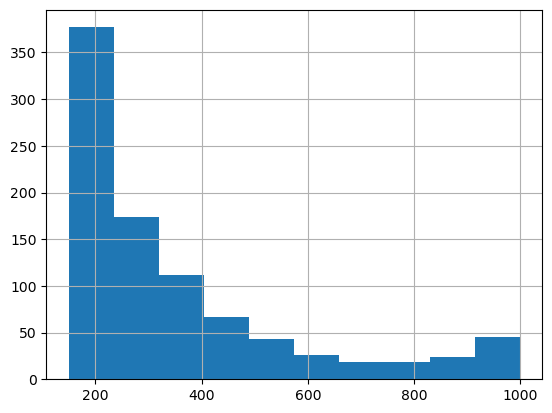

In [47]:
dfcombi[dfcombi['p_fdr']<0.05].drop_duplicates('snps').combined_score.hist()

<Axes: >

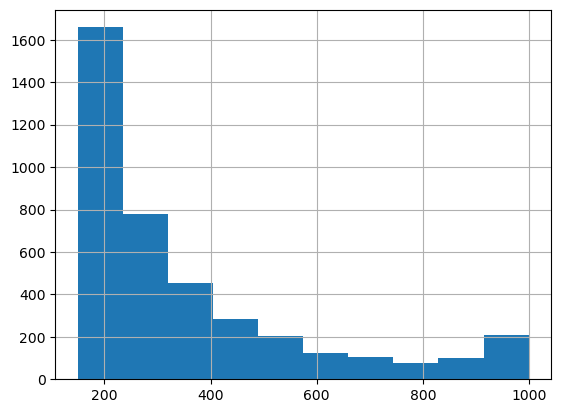

In [33]:
dfcombi.combined_score.hist()